In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                        MultiComparison)
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
resolution = pd.read_csv('id_gr_events.csv')

In [3]:
pg.homoscedasticity(data = resolution, dv = 'events', group = 'group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [4]:
df_a = resolution.query("group == 'A'")
df_b = resolution.query("group == 'B'")
df_c = resolution.query("group == 'C'")

In [5]:
pg.normality(data = resolution, dv = 'events', group = 'group', method = 'normaltest')

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [6]:
pg.anova(data = resolution, dv = 'events', between = 'group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [7]:
pg.pairwise_tukey(data = resolution, dv = 'events', between = 'group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [8]:
resolution.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [9]:
pairwise_tukeyhsd(resolution.events, resolution.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [10]:
resolution.groupby('group', as_index = False) \
    .agg({'events': 'mean'})

,group,events
0,A,29.5796
1,B,37.6136
2,C,27.4703


In [11]:
# Группа 2

In [12]:
button = pd.read_csv('segment.csv')

In [13]:
test_button = button.query("group == 'test'")
control_button = button.query("group == 'control'")

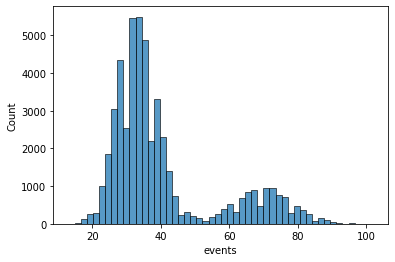

In [14]:
sns.histplot(test_button.events, bins = 50)

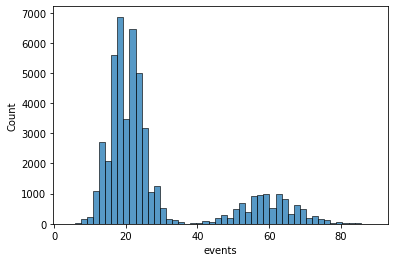

In [15]:
sns.histplot(control_button.events, bins = 50)

In [16]:
np.std(control_button.query("segment == 'high'").events)

7.804956589245068

In [17]:
model_interact = smf.ols('events ~ C(segment) + C(group) + C(segment):C(group)', data=button).fit()
anova_lm(model_interact)

,df,sum_sq,mean_sq,F,PR(>F)
C(segment),1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
C(group),1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
C(segment):C(group),1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [18]:
button['combination'] = button.group + ' / ' + button.segment

In [19]:
pairwise_tukeyhsd(button.events, button.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


In [20]:
button.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


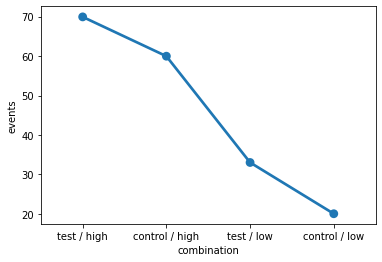

In [21]:
sns.pointplot(x = 'combination', y = 'events', data = button)